# Processing Images and Videos - Exercises Solutions
## Computer Vision and Image Processing - Lab Session 3
### Prof: Luigi Di Stefano, luigi.distefano@unibo.it
### Tutor: Andrea Amaduzzi, andrea.amaduzzi4@unibo.it - Iacopo Curti, iacopo.curti2@unibo.it

## Exercise 1: Linear Contrast Stretching
Implement a linear contrast stretching function.

Given $P_{max}$ and $P_{min}$ the maximum and minimum pixel value respectively (can be different from the min and max values of the image), convert each pixel of the original image $P_{in}$ into the new pixel of the output image $P_{out}$ with the following formula:

$P_{out} = \frac{255}{P_{max} - P_{min}}(P_{in} - P_{min})$

Test the function 3 times on the __grayscale__ image "ex/image.png" using as $P_{max}$ and $P_{min}$:

* The minimum and maximum value of the image  respectively. You can use **np.max(array, axis)** and **np.min(array, axis)** to calculate them. 
* $P_{max}=40$ and $P_{min}=0$.
* Choose as $P_{max}$ and $P_{min}$ the values at 95% and 5% percentiles of the distribution respectively (the value of the 5% pixels ordered from the lowest value pixel). 

Plot the histogram of the image before and after each transformation.

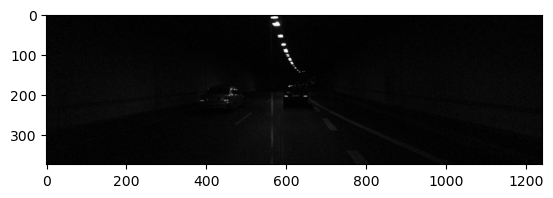

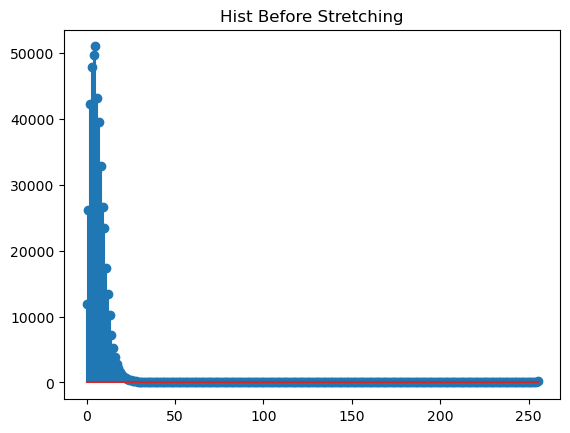

Output image type:  float64


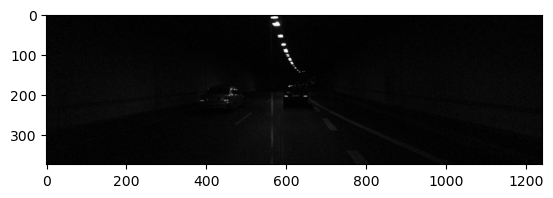

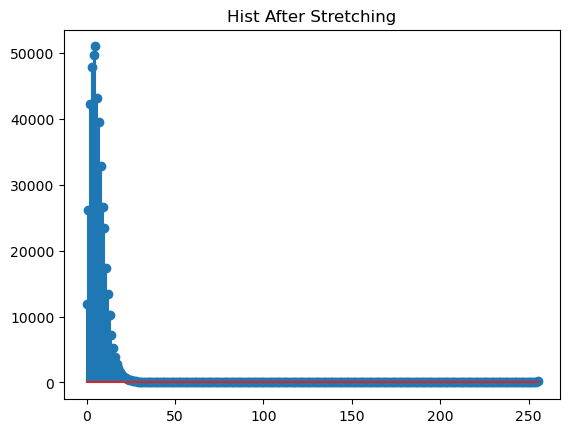

Output image type:  float64


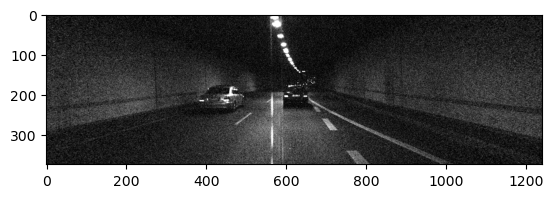

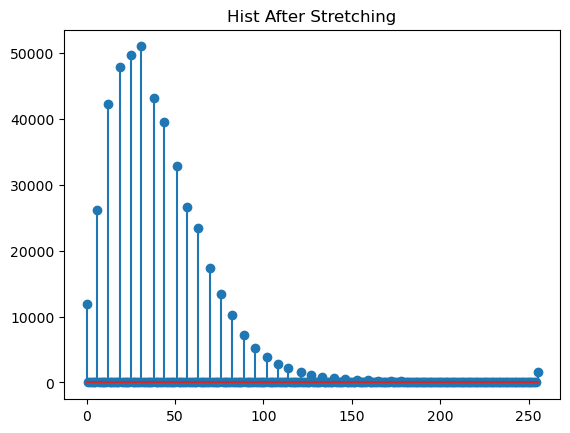

Max 95%:  15  Min 5%:  2
Output image type:  float64


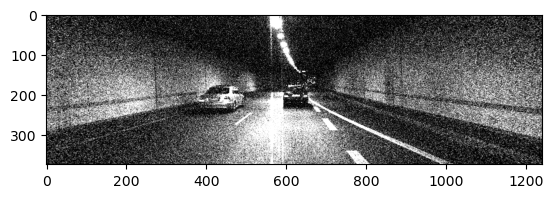

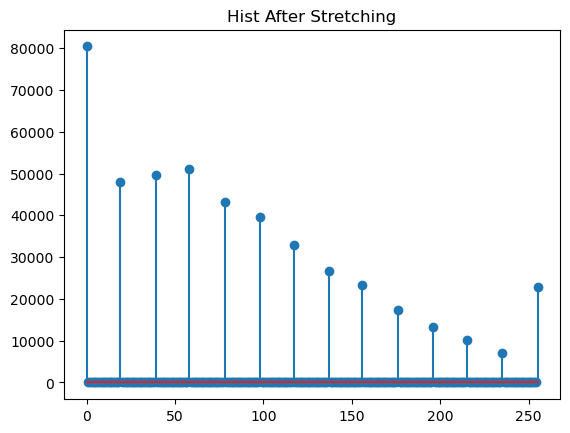

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def linear_stretching(img, max_value, min_value):
    img[img<min_value] = min_value
    img[img>max_value] = max_value
    linear_stretched_img = 255./(max_value-min_value)*(img-min_value)
    print("Output image type: ", linear_stretched_img.dtype)
    return linear_stretched_img


def find_percentile_value(hist, percentile):
    s = 0
    idx = 0
    total_pixel = np.sum(hist)
    while(s < total_pixel*percentile/100):
        s += hist[idx]
        idx += 1
    return idx

# Reading the image
img = cv2.imread("ex/image.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray',vmin=0,vmax=255)
plt.show()

# Extracting the histogram
hist,bins = np.histogram(img.flatten(),256,[0,256])

# Plotting the histogram before stretching
plt.title("Hist Before Stretching")
plt.stem(hist)#, use_line_collection=True)
plt.show()

# Stretching with max and min of the image. Not effective because of outliers.
max_value = np.max(img)
min_value = np.min(img)
linear_stretched_img=linear_stretching(np.copy(img), max_value,min_value)
hist_st,bins = np.histogram(linear_stretched_img.astype(np.uint8).flatten(),256,[0,256])
plt.imshow(linear_stretched_img,cmap='gray',vmin=0,vmax=255)
plt.show()
plt.title("Hist After Stretching")
plt.stem(hist_st)#, use_line_collection=True)
plt.show()

# Stretching with fixed max and min.
max_value = 40
min_value = 0
linear_stretched_img=linear_stretching(np.copy(img), max_value,min_value)
hist_st,bins = np.histogram(linear_stretched_img.astype(np.uint8).flatten(),256,[0,256])
plt.imshow(linear_stretched_img,cmap='gray',vmin=0,vmax=255)
plt.show()
plt.title("Hist After Stretching")
plt.stem(hist_st)#, use_line_collection=True)
plt.show()

# Stretching with dynamic max and min based on percentiles.
max_value = find_percentile_value(hist, 95)
min_value = find_percentile_value(hist, 5)
print("Max 95%: ", max_value, " Min 5%: ", min_value)
linear_stretched_img=linear_stretching(np.copy(img), max_value,min_value)
hist_st,bins = np.histogram(linear_stretched_img.astype(np.uint8).flatten(),256,[0,256])
plt.imshow(linear_stretched_img,cmap='gray',vmin=0,vmax=255)
plt.show()
plt.title("Hist After Stretching")
plt.stem(hist_st)#, use_line_collection=True)
plt.show()

## Exercise 2: Other Filters
Apply a denoising filter and an high-pass filter (edge-enhancement) to an image.

* Denoising filter = $\begin{bmatrix} 
                        1 & 2 & 1\\
                        2 & 4 & 2\\
                        1 & 2 & 1\\
                        \end{bmatrix}\frac{1}{16} $

* High pass filter (edge-enhancement) = $\begin{bmatrix} 
                        0 & 1 & 0\\
                        1 & -4 & 1\\
                        0 & 1 & 0\\
                        \end{bmatrix}$

Test it on the __grayscale__ image "ex/landscape.jpg".

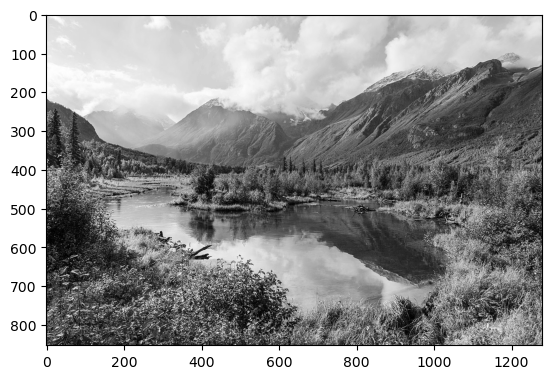

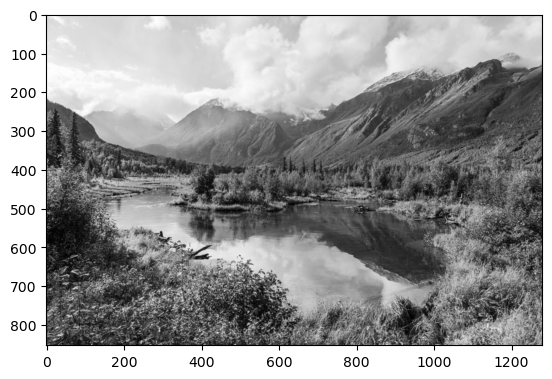

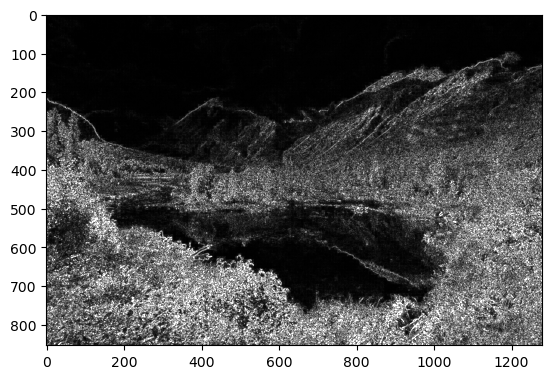

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Reading the image
img = cv2.imread("ex/landscape.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray',vmin=0,vmax=255)
plt.show()

denoising_kernel = np.array([
            [1,2,1],
            [2,4,2],
            [1,2,1]])/16

img_tr = cv2.filter2D(img,-1,denoising_kernel)
plt.imshow(img_tr,cmap='gray',vmin=0,vmax=255)
plt.show()

high_pass_kernel = np.array([
            [0,1,0],
            [1,-4,1],
            [0,1,0]])

img_tr = cv2.filter2D(img.astype(float),-1,high_pass_kernel)
img_tr = np.abs(img_tr)
plt.imshow(img_tr,cmap='gray',vmin=0,vmax=255)
plt.show()

## Exercise 3:  Playing with Filters

Denoise 3 images  ("ex/noise_1.png", "ex/noise_2.png", "ex/noise_3.png"), in the best way that you could, with the sequence of filters that you prefer. Then compute the Peak Signal to Noise Ration (PSNR) of the original image ("ex/orginal_image.png") and the filtered image that you have obtained, in order to compare your results with the ones of your collegues. 

**PSNR formula**: $PSNR = 20log_{10}(\frac{MAX_I}{\sqrt{MSE}})$

where $MSE = \frac{1}{m \, n} \sum_{i=0}^{m-1} \sum_{j=0}^{n-1} [I(i,j) - K(i,j)]^{2}$ and $MAX_I$ is the maximum possible pixel value of the image.

Use the function of OpenCV **cv2.PSNR(img1, img2)** in order to compute the PSNR between img1 and img2.

Your Imagination is the Limit!! Good Luck!!

The students that will get the best results, will receive a **surprise**!!



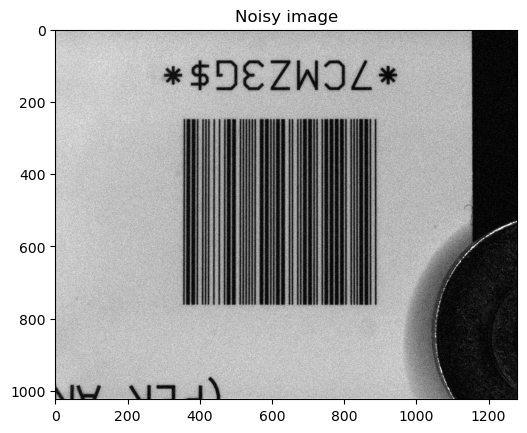

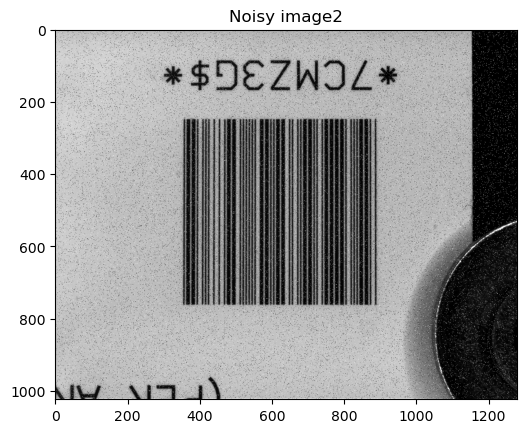

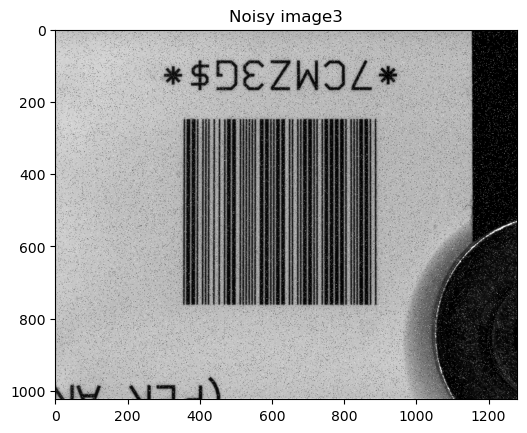

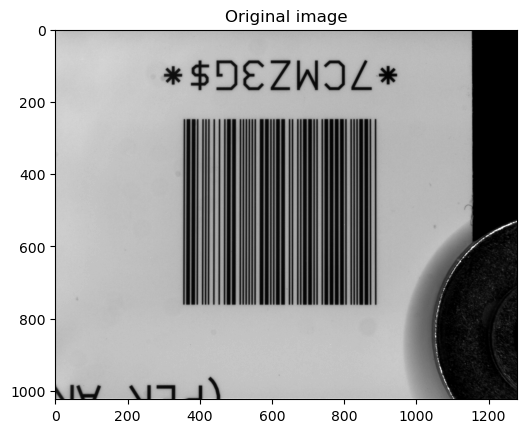

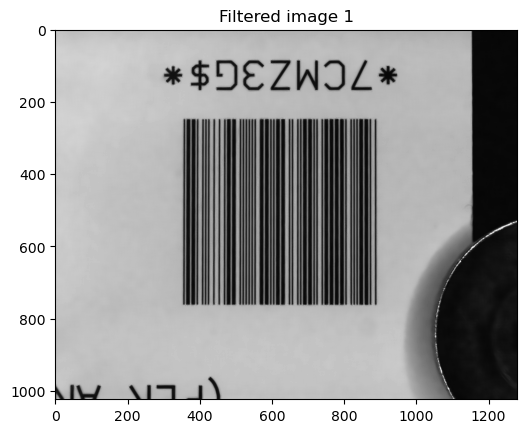

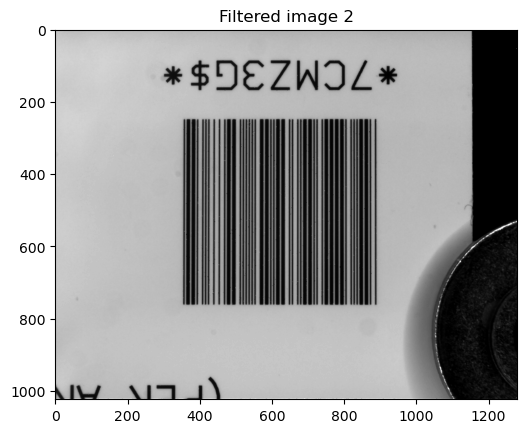

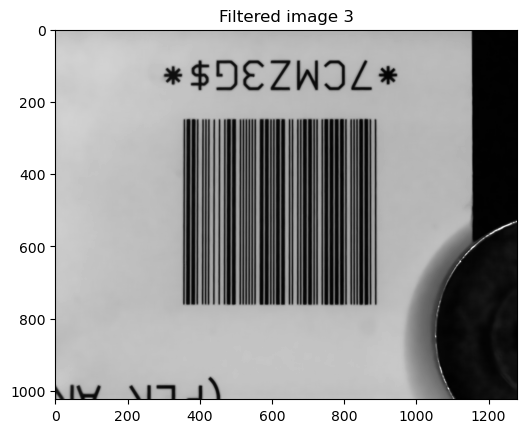

The PSNR of the original image wrt filtered one (noise 1) is 34.04786918438112 db
The PSNR of the original image wrt filtered one (noise 2) is 37.82287022407428 db
The PSNR of the original image wrt filtered one (noise 3) is 34.36340966024994 db
The PSNR of the original image wrt filtered one is 361.20199909921956 db


In [47]:

import cv2
import numpy as np
from matplotlib import pyplot as plt

# Reading the image
noisy_img = cv2.imread("ex/noise_1.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(noisy_img,cmap='gray',vmin=0,vmax=255)
plt.title("Noisy image")
plt.show()

noisy_img2 = cv2.imread("ex/noise_2.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(noisy_img2,cmap='gray',vmin=0,vmax=255)
plt.title("Noisy image2")
plt.show()

noisy_img3 = cv2.imread("ex/noise_3.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(noisy_img2,cmap='gray',vmin=0,vmax=255)
plt.title("Noisy image3")
plt.show()

img_orig = cv2.imread("ex/original_image.BMP", cv2.IMREAD_GRAYSCALE)
plt.imshow(img_orig,cmap='gray',vmin=0,vmax=255)
plt.title("Original image")
plt.show()

# Insert your operations on one of the noisy image here
#######################
# example for the first noise
img_filt = cv2.fastNlMeansDenoising(noisy_img,10,21,11)  # 10 13 21

plt.imshow(img_filt, cmap='gray', vmin=0, vmax=255)
plt.title("Filtered image 1")
plt.show()

# example for the second noise
img_filt_2 = cv2.medianBlur(noisy_img2, 3)  # kernel size 3x3
plt.imshow(img_filt_2, cmap='gray', vmin=0, vmax=255)
plt.title("Filtered image 2")
plt.show()

# example for the third noise
img_filt_3_ = cv2.medianBlur(noisy_img3, 3)
img_filt_3 = cv2.fastNlMeansDenoising(img_filt_3_,10,21,11)

plt.imshow(img_filt_3, cmap='gray', vmin=0, vmax=255)
plt.title("Filtered image 3")
plt.show()
########################

psnr = cv2.PSNR(img_orig, img_filt)
print(f"The PSNR of the original image wrt filtered one (noise 1) is {psnr} db")

psnr = cv2.PSNR(img_orig, img_filt_2)
print(f"The PSNR of the original image wrt filtered one (noise 2) is {psnr} db")

psnr = cv2.PSNR(img_orig, img_filt_3)
print(f"The PSNR of the original image wrt filtered one (noise 3) is {psnr} db")

psnr = cv2.PSNR(img_orig, img_orig)
print(f"The PSNR of the original image wrt filtered one is {psnr} db")
# as expected the value of the Peak Signal to Noise Ratio is high since the two images are equal, it is around 361 db


## Exercise 4: Exponential Operator

It is sometimes desirable to selectively enhance the contrast in either dark (under-exposed) or bright (over-exposed) areas of the image. Linear stretching, though, would expand the contrast uniformly. However, a non-linear mapping, such as the Exponential Operator, can be deployed:

<img src="LabSession3Images/exp_op.png" width="320">

Thus, taking $r<1$ would stretch the intensity dynamics of dark areas and shrink that of bright ones, which turns out effective to improve under-exposed images. The opposite behaviour is achieved with $r>1$, which therefore can be used to enhance over-exposed images.

The operator is also known as __gamma correction__, due to its widespread use to compensate for the exponential voltage-to-intensity mapping ($I=V^r$) of old CRT monitors (often  $r=2.2$, i.e. darkening), which can be compensated by brightening  the image ($r'=\frac{1}{r}=0.45$) before displaying. 

Given an exponent $r$, $P_{out}$ the output pixel value and $P_{in}$ the input pixel value, the formula for the exponential operator is the following:

$P_{out}=255*(\frac{P_{in}}{255})^r$

Implement an exponential operator using as $r=0.45$.
Test the function on the __grayscale__ image "ex/image.png".
Plot the histogram of the image before and after the transformation.

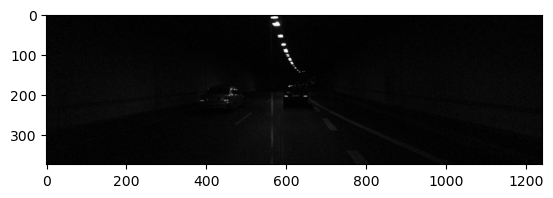

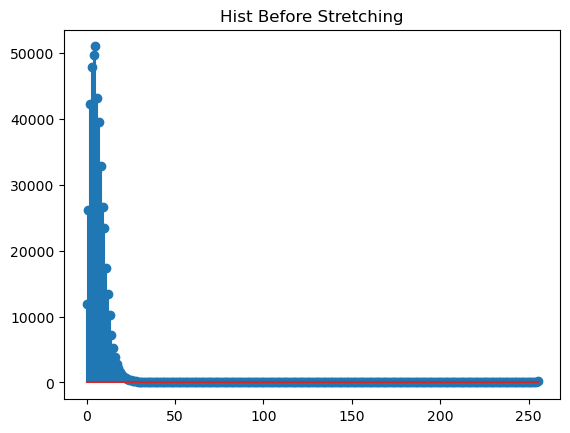

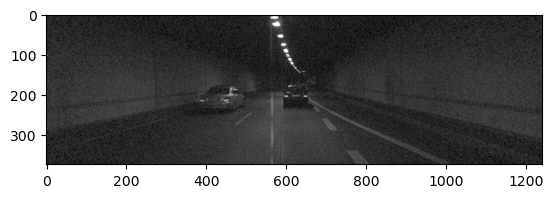

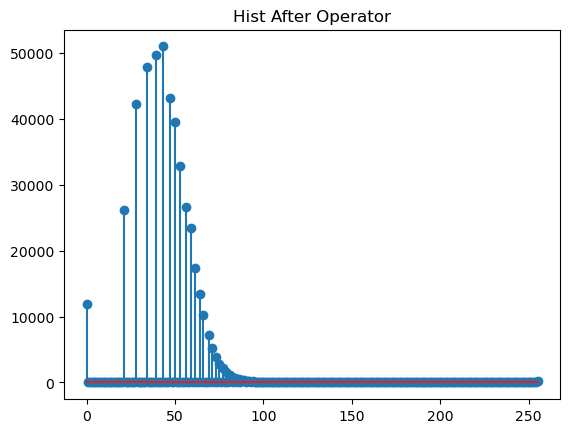

In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Reading the image
img = cv2.imread("ex/image.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray',vmin=0,vmax=255)
plt.show()

def exponential_operator(img, r):
    exp_img = ((img/255)**r) *255
    return exp_img
    
# Extracting the histogram
hist,bins = np.histogram(img.flatten(),256,[0,256])

# Plotting the histogram before operator
plt.title("Hist Before Stretching")
plt.stem(hist)#, use_line_collection=True)
plt.show()

exp_img = exponential_operator(img, 0.45)
hist_st,bins = np.histogram(exp_img.astype(np.uint8).flatten(),256,[0,256])
plt.imshow(exp_img,cmap='gray',vmin=0,vmax=255)
plt.show()
plt.title("Hist After Operator")
plt.stem(hist_st)#, use_line_collection=True)
plt.show()

## Exercise 5

Apply one or more of the previous operators on each frame of the video with path 'ex/1.avi'.

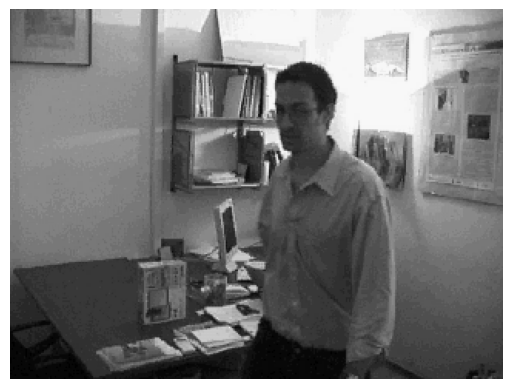

In [23]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
# Import additional library to properply play videos on jupyter notebook
from IPython.display import clear_output

# Loading video
cap = cv2.VideoCapture('ex/1.avi')
try:
    while(cap.isOpened()):
        ret, frame = cap.read()
        if ret and not frame is None:
            frame = frame.astype(float)
            # Insert your operations on the frame here
            
            ###########################
            # Display the frame
            frame = frame.astype(np.uint8)
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            plt.axis('off')
            plt.imshow(frame)
            plt.show()
            clear_output(wait=True)
        else:
            break
    cap.release()
except KeyboardInterrupt:
    # If we press top release the video
    cap.release()
    print("Released Video Resource")